# Part 0: Import 套件

In [2]:
#下載資料套件
import urllib3
from bs4 import BeautifulSoup

#資料處理套件
import pandas as pd
from datetime import date

# 畫圖套件
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Part 1: 下載選擇權三大法人日報
- 資料來源：[證交所 三大法人買賣超日報](https://www.taifex.com.tw/cht/3/optContractsDate)

## 1.1: 下載選擇權三大法人日報
用urllib3下載選擇權三大法人日報

In [3]:
http = urllib3.PoolManager()
url = "https://www.taifex.com.tw/cht/3/optContractsDate"
res = http.request(
     'POST',
      url,
      fields={
         'queryType': 1,
         'doQuery': 1,
         'queryDate': '2021/11/12'
      }
 )

html_doc = res.data
html_doc

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">\r\n\r\n\r\n<head><meta http-equiv="X-UA-Compatible" content="IE=edge"></head>\r\n<html xmlns="http://www.w3.org/1999/xhtml" lang="zh-TW" >\r\n\t\t<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\r\n  <link rel="shortcut icon" type="image/x-icon" href="/cht/resources/front/cht/images/favicon.ico" />\r\n  <meta property="og:image" content="https://www.taifex.com.tw/chinese/images/fb_logo.jpg" />\r\n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n  <meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n  <title>\xe8\x87\xba\xe7\x81\xa3\xe6\x9c\x9f\xe8\xb2\xa8\xe4\xba\xa4\xe6\x98\x93\xe6\x89\x80-\xe4\xba\xa4\xe6\x98\x93\xe8\xb3\x87\xe8\xa8\x8a-\xe4\xb8\x89\xe5\xa4\xa7\xe6\xb3\x95\xe4\xba\xba-\xe6\x9f\xa5\xe8\xa9\xa2-\xe5\x8d\x80\xe5\x88\x86\xe5\x90\x84\xe9\x81\xb8\xe6\x93\x87\xe6\xac\x8a\xe5\xa5\x91\xe7\xb4\x84-\xe4\xbe\x9d\xe6\x97\xa5\xe6\x

用BeautifulSoup解析資料

In [4]:
soup = BeautifulSoup(html_doc, 'html.parser')
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01//EN" "http://www.w3.org/TR/html4/strict.dtd">

<head><meta content="IE=edge" http-equiv="X-UA-Compatible"/></head>
<html lang="zh-TW" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/cht/resources/front/cht/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<meta content="https://www.taifex.com.tw/chinese/images/fb_logo.jpg" property="og:image">
<meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>臺灣期貨交易所-交易資訊-三大法人-查詢-區分各選擇權契約-依日期</title>
<link href="/cht/resources/front/cht/css/global.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/content.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/index.css" rel="stylesheet" type="text/css"/>
<link href="/cht/resources/front/cht/css/free.css" rel="stylesheet" type="text/css

找出含有選擇權日報的資料表

In [5]:
table = soup.findAll('table')[3]
table

<table bgcolor="#336699" border="0" bordercolordark="#ffffff" cellpadding="0" cellspacing="0" class="table_f" width="920px"> <tbody>
<tr class="12bk">
<td align="middle" bgcolor="#6699CC" class="link_tit" colspan="3" rowspan="2"><div align="center"></div></td>
<th align="middle" bgcolor="#6699CC" colspan="6" scope="colgroup"><div align="center">交易口數與契約金額</div></th>
<th align="middle" bgcolor="#6699CC" colspan="6" scope="colgroup"><div align="center">未平倉餘額</div></th>
</tr>
<tr class="12bk">
<th align="right" bgcolor="#6699CC" colspan="2" scope="colgroup"><div align="center">多方</div></th>
<th align="right" bgcolor="#6699CC" colspan="2" scope="colgroup"><div align="center">空方</div></th>
<th align="right" bgcolor="#6699CC" colspan="2" scope="colgroup"><div align="center">多空淨額</div></th>
<th align="right" bgcolor="#6699CC" colspan="2" scope="colgroup"><div align="center">多方</div></th>
<th align="right" bgcolor="#6699CC" colspan="2" scope="colgroup"><div align="center">空方</div></th>
<th alig

將其轉成dataframe

In [6]:
df = pd.read_html(str(table))
df

[       0       1    2          3          4          5          6          7   \
 0     NaN     NaN  NaN  交易口數與契約金額  交易口數與契約金額  交易口數與契約金額  交易口數與契約金額  交易口數與契約金額   
 1     NaN     NaN  NaN         多方         多方         空方         空方       多空淨額   
 2      序號    商品名稱  身份別         口數       契約金額         口數       契約金額         口數   
 3       1   臺指選擇權  自營商     179851     508149     173297     498022       6554   
 4       1   臺指選擇權   投信          0          0          0          0          0   
 5       1   臺指選擇權   外資     101263     479329     102466     475900      -1203   
 6       2   電子選擇權  自營商        176        606        204        966        -28   
 7       2   電子選擇權   投信          0          0          0          0          0   
 8       2   電子選擇權   外資          0          0          0          0          0   
 9       3   金融選擇權  自營商        197        481        289        459        -92   
 10      3   金融選擇權   投信          0          0          0          0          0   
 11      3   金融選

In [7]:
df = df[0]
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,NaN,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,未平倉餘額,未平倉餘額,未平倉餘額,未平倉餘額,未平倉餘額,未平倉餘額
1,NaN,NaN,NaN,多方,多方,空方,空方,多空淨額,多空淨額,多方,多方,空方,空方,多空淨額,多空淨額
2,序號,商品名稱,身份別,口數,契約金額,口數,契約金額,口數,契約金額,口數,契約金額,口數,契約金額,口數,契約金額
3,1,臺指選擇權,自營商,179851,508149,173297,498022,6554,10126,107751,571351,119632,596308,-11881,-24957
4,1,臺指選擇權,投信,0,0,0,0,0,0,60,40,0,0,60,40
5,1,臺指選擇權,外資,101263,479329,102466,475900,-1203,3429,90089,628973,118464,739110,-28375,-110137
6,2,電子選擇權,自營商,176,606,204,966,-28,-360,1092,5532,1159,5083,-67,449
7,2,電子選擇權,投信,0,0,0,0,0,0,0,0,0,0,0,0
8,2,電子選擇權,外資,0,0,0,0,0,0,0,0,0,0,0,0
9,3,金融選擇權,自營商,197,481,289,459,-92,22,986,3145,2009,1191,-1023,1954


## 1.2: 資料處理與轉型

In [8]:
df.drop(columns = df.columns[0], axis = 1, inplace = True)
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,NaN,NaN,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,未平倉餘額,未平倉餘額,未平倉餘額,未平倉餘額,未平倉餘額,未平倉餘額
1,NaN,NaN,多方,多方,空方,空方,多空淨額,多空淨額,多方,多方,空方,空方,多空淨額,多空淨額
2,商品名稱,身份別,口數,契約金額,口數,契約金額,口數,契約金額,口數,契約金額,口數,契約金額,口數,契約金額
3,臺指選擇權,自營商,179851,508149,173297,498022,6554,10126,107751,571351,119632,596308,-11881,-24957
4,臺指選擇權,投信,0,0,0,0,0,0,60,40,0,0,60,40


In [9]:
df.columns = ['商品名稱', '身份別', '多方交易口數', '多方契約金額', '空方交易口數', '空方契約金額', '多空淨額口數', '多空淨額契約金額', '多方未平倉口數', '多方未平倉契約金額', '空方未平倉口數', '空方未平倉契約金額','多空淨額未平倉口數', '多空淨額未平倉契約金額']
df

,商品名稱,身份別,多方交易口數,多方契約金額,空方交易口數,空方契約金額,多空淨額口數,多空淨額契約金額,多方未平倉口數,多方未平倉契約金額,空方未平倉口數,空方未平倉契約金額,多空淨額未平倉口數,多空淨額未平倉契約金額
0,NaN,NaN,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,交易口數與契約金額,未平倉餘額,未平倉餘額,未平倉餘額,未平倉餘額,未平倉餘額,未平倉餘額
1,NaN,NaN,多方,多方,空方,空方,多空淨額,多空淨額,多方,多方,空方,空方,多空淨額,多空淨額
2,商品名稱,身份別,口數,契約金額,口數,契約金額,口數,契約金額,口數,契約金額,口數,契約金額,口數,契約金額
3,臺指選擇權,自營商,179851,508149,173297,498022,6554,10126,107751,571351,119632,596308,-11881,-24957
4,臺指選擇權,投信,0,0,0,0,0,0,60,40,0,0,60,40
5,臺指選擇權,外資,101263,479329,102466,475900,-1203,3429,90089,628973,118464,739110,-28375,-110137
6,電子選擇權,自營商,176,606,204,966,-28,-360,1092,5532,1159,5083,-67,449
7,電子選擇權,投信,0,0,0,0,0,0,0,0,0,0,0,0
8,電子選擇權,外資,0,0,0,0,0,0,0,0,0,0,0,0
9,金融選擇權,自營商,197,481,289,459,-92,22,986,3145,2009,1191,-1023,1954


In [10]:
df.drop(labels = range(3), axis = 0, inplace = True)
df

,商品名稱,身份別,多方交易口數,多方契約金額,空方交易口數,空方契約金額,多空淨額口數,多空淨額契約金額,多方未平倉口數,多方未平倉契約金額,空方未平倉口數,空方未平倉契約金額,多空淨額未平倉口數,多空淨額未平倉契約金額
3,臺指選擇權,自營商,179851,508149,173297,498022,6554,10126,107751,571351,119632,596308,-11881,-24957
4,臺指選擇權,投信,0,0,0,0,0,0,60,40,0,0,60,40
5,臺指選擇權,外資,101263,479329,102466,475900,-1203,3429,90089,628973,118464,739110,-28375,-110137
6,電子選擇權,自營商,176,606,204,966,-28,-360,1092,5532,1159,5083,-67,449
7,電子選擇權,投信,0,0,0,0,0,0,0,0,0,0,0,0
8,電子選擇權,外資,0,0,0,0,0,0,0,0,0,0,0,0
9,金融選擇權,自營商,197,481,289,459,-92,22,986,3145,2009,1191,-1023,1954
10,金融選擇權,投信,0,0,0,0,0,0,0,0,0,0,0,0
11,金融選擇權,外資,0,0,0,0,0,0,0,0,0,0,0,0
12,股票選擇權,自營商,85,57,100,407,-15,-351,788,5485,1644,5911,-856,-426


In [11]:
df = df.loc[(df['商品名稱'] == '臺指選擇權')]
df

,商品名稱,身份別,多方交易口數,多方契約金額,空方交易口數,空方契約金額,多空淨額口數,多空淨額契約金額,多方未平倉口數,多方未平倉契約金額,空方未平倉口數,空方未平倉契約金額,多空淨額未平倉口數,多空淨額未平倉契約金額
3,臺指選擇權,自營商,179851,508149,173297,498022,6554,10126,107751,571351,119632,596308,-11881,-24957
4,臺指選擇權,投信,0,0,0,0,0,0,60,40,0,0,60,40
5,臺指選擇權,外資,101263,479329,102466,475900,-1203,3429,90089,628973,118464,739110,-28375,-110137


資料轉型

In [12]:
for col in range(2, df.shape[1]):
    for row in range(df.shape[0]):
        df.iloc[row, col] = float(df.iloc[row,col])
        
df

,商品名稱,身份別,多方交易口數,多方契約金額,空方交易口數,空方契約金額,多空淨額口數,多空淨額契約金額,多方未平倉口數,多方未平倉契約金額,空方未平倉口數,空方未平倉契約金額,多空淨額未平倉口數,多空淨額未平倉契約金額
3,臺指選擇權,自營商,179851.0,508149.0,173297.0,498022.0,6554.0,10126.0,107751.0,571351.0,119632.0,596308.0,-11881.0,-24957.0
4,臺指選擇權,投信,0.0,0.0,0.0,0.0,0.0,0.0,60.0,40.0,0.0,0.0,60.0,40.0
5,臺指選擇權,外資,101263.0,479329.0,102466.0,475900.0,-1203.0,3429.0,90089.0,628973.0,118464.0,739110.0,-28375.0,-110137.0


# Part 2: 下載多天的選擇權三大法人日報

In [3]:
def get_tw_options_investor(start_year, start_month, start_day, end_year, end_month, end_day):
    start_date = str(date(start_year, start_month, start_day))
    end_date = str(date(end_year, end_month, end_day))
    date_list = pd.date_range(start_date, end_date, freq='D').strftime("%Y/%m/%d").tolist()

    df = pd.DataFrame()
    http = urllib3.PoolManager()
    url = "https://www.taifex.com.tw/cht/3/optContractsDate"
    for day in date_list:  
        res = http.request(
             'POST',
              url,
              fields={'queryType': 1,
                      'doQuery': 1,
                      'queryDate': day
              }
         )
        html_doc = res.data
        soup = BeautifulSoup(html_doc, 'html.parser')
        table = soup.findAll('table')[3]
        df_day = pd.read_html(str(table))[0]
        df_day.drop(columns = df_day.columns[0], axis = 1, inplace = True)
        #加入日期
        df_day.insert(0, '日期', day)
        df = df.append(df_day.iloc[3:6, :], ignore_index = True)
    
    # 加上df欄位名稱
    df.columns = ['日期', '商品名稱', '身份別', '多方交易口數', '多方契約金額', '空方交易口數', '空方契約金額', '多空淨額口數', '多空淨額契約金額', '多方未平倉口數', '多方未平倉契約金額', '空方未平倉口數', '空方未平倉契約金額','多空淨額未平倉口數', '多空淨額未平倉契約金額']
    
    # 資料轉型
    for col in range(3, df.shape[1]):
        for row in range(df.shape[0]):
            df.iloc[row, col] = float(df.iloc[row,col])
    
    return df

In [4]:
df = get_tw_options_investor(start_year = 2021, 
                             start_month = 11, 
                             start_day = 1, 
                             end_year = 2021, 
                             end_month = 11, 
                             end_day = 12)  
df

,日期,商品名稱,身份別,多方交易口數,多方契約金額,空方交易口數,空方契約金額,多空淨額口數,多空淨額契約金額,多方未平倉口數,多方未平倉契約金額,空方未平倉口數,空方未平倉契約金額,多空淨額未平倉口數,多空淨額未平倉契約金額
0,2021/11/01,臺指選擇權,自營商,173543.0,440409.0,167012.0,411981.0,6531.0,28427.0,100497.0,404092.0,122896.0,504144.0,-22399.0,-100052.0
1,2021/11/01,臺指選擇權,投信,0.0,0.0,0.0,0.0,0.0,0.0,61.0,388.0,0.0,0.0,61.0,388.0
2,2021/11/01,臺指選擇權,外資,102025.0,447518.0,104938.0,435571.0,-2913.0,11947.0,61537.0,498814.0,76372.0,507658.0,-14835.0,-8844.0
3,2021/11/02,臺指選擇權,自營商,258398.0,615073.0,253932.0,616547.0,4466.0,-1473.0,114330.0,424103.0,132263.0,530698.0,-17933.0,-106595.0
4,2021/11/02,臺指選擇權,投信,0.0,0.0,0.0,0.0,0.0,0.0,61.0,402.0,0.0,0.0,61.0,402.0
5,2021/11/02,臺指選擇權,外資,160297.0,606480.0,163444.0,612026.0,-3147.0,-5546.0,63308.0,505199.0,81290.0,519304.0,-17982.0,-14105.0
6,2021/11/03,臺指選擇權,自營商,246170.0,429010.0,240137.0,385248.0,6033.0,43762.0,75501.0,353862.0,95764.0,418496.0,-20263.0,-64634.0
7,2021/11/03,臺指選擇權,投信,7.0,13.0,7.0,0.0,0.0,13.0,61.0,338.0,0.0,0.0,61.0,338.0
8,2021/11/03,臺指選擇權,外資,138991.0,369056.0,143383.0,383879.0,-4392.0,-14823.0,59782.0,473522.0,76147.0,501227.0,-16365.0,-27705.0
9,2021/11/04,臺指選擇權,自營商,171186.0,532056.0,167246.0,513452.0,3940.0,18604.0,90971.0,398098.0,107294.0,429668.0,-16323.0,-31570.0


# Part 3: 將下載的選擇權三大法人日報另存成csv檔

In [5]:
df.to_csv("options_investor.csv")

# Part 4: 畫出選擇權的三大法人未平倉口數

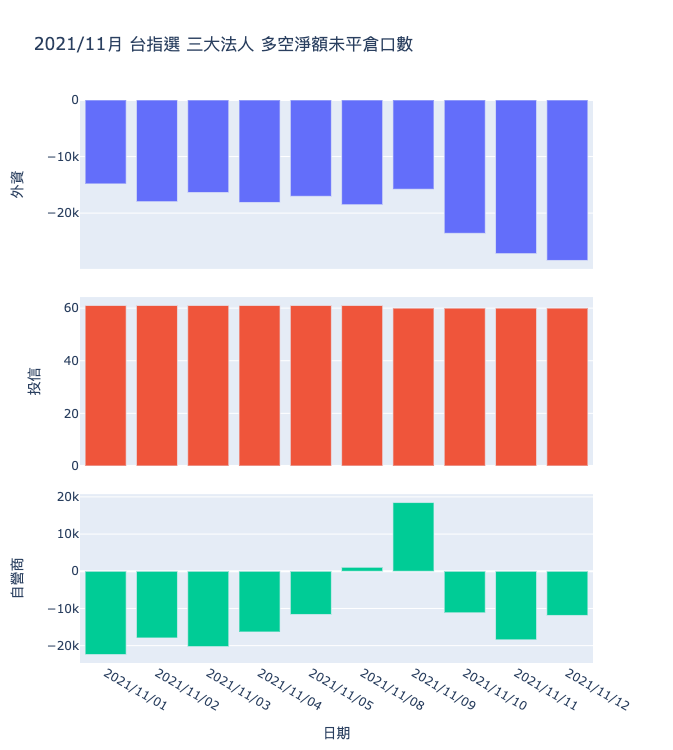

In [8]:
# 設定子圖
fig = make_subplots(rows = 3, 
                    cols = 1, 
                    shared_xaxes = True, 
                    vertical_spacing = 0.05,  
                    row_width=[0.3, 0.3, 0.3])


# 圖三：畫外資買賣超成交量
fig.add_trace(go.Bar(x = df['日期'].unique(), 
                     y = df.loc[(df['身份別'] == '外資')]['多空淨額未平倉口數'], 
                     showlegend = False,
                     name = '外資買賣超成交量'), 
              row = 1, 
              col = 1)

# 圖四：畫投信買賣超成交量
fig.add_trace(go.Bar(x = df['日期'].unique(), 
                     y = df.loc[(df['身份別'] == '投信')]['多空淨額未平倉口數'], 
                     showlegend = False,
                     name = '投信買賣超成交量'), 
              row = 2, 
              col = 1)

# 圖五：畫自營商買賣超成交量
fig.add_trace(go.Bar(x = df['日期'].unique(), 
                     y = df.loc[(df['身份別'] == '自營商')]['多空淨額未平倉口數'], 
                     showlegend = False,
                     name = '自營商買賣超成交量'), 
              row = 3, 
              col = 1)


# 設x軸標題
fig.update_xaxes(title_text = "日期", row = 3, col = 1)

# 設y軸標題
fig.update_yaxes(title_text = "外資", row = 1, col = 1)
fig.update_yaxes(title_text = "投信", row = 2, col = 1)
fig.update_yaxes(title_text = "自營商", row = 3, col = 1)

# 設圖標及圖長寬
fig.update_layout(
    title_text = "2021/11月 台指選 三大法人 多空淨額未平倉口數",
    width = 600,
    height = 750
)

fig.update(layout_xaxis_rangeslider_visible = False)
fig.show()